<a href="https://colab.research.google.com/github/Bhavya-31/9921103089/blob/main/Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
num_samples = 1000

# Generate random temperature data (20°C to 60°C)
temperature = np.random.uniform(20, 60, num_samples)

# Generate random charge cycle data (100 to 1000 cycles)
charge_cycles = np.random.randint(100, 1000, num_samples)

# Generate failure label based on conditions (e.g., high temperature & cycles -> failure)
failure = [
    1 if (temp > 45 and cycles > 700) or (temp > 50 and cycles > 500) else 0
    for temp, cycles in zip(temperature, charge_cycles)
]

# Create DataFrame
data = pd.DataFrame({
    'temperature': temperature,
    'charge_cycles': charge_cycles,
    'failure': failure
})

# Save to CSV
data.to_csv('battery_data.csv', index=False)

# Display first few rows
print(data.head())


   temperature  charge_cycles  failure
0    34.981605            914        0
1    58.028572            111        0
2    49.279758            417        0
3    43.946339            691        0
4    26.240746            315        0


In [2]:
# Install required packages
!pip install pandas numpy scikit-learn matplotlib

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load data (replace 'battery_data.csv' with your actual data file)
data = pd.read_csv('battery_data.csv')

# Display basic information about the dataset
print(data.info())
print(data.head())

# Check for missing values and handle them if necessary
data = data.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   temperature    1000 non-null   float64
 1   charge_cycles  1000 non-null   int64  
 2   failure        1000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 23.6 KB
None
   temperature  charge_cycles  failure
0    34.981605            914        0
1    58.028572            111        0
2    49.279758            417        0
3    43.946339            691        0
4    26.240746            315        0


In [5]:
# Feature and target selection
X = data[['temperature', 'charge_cycles']]
y = data['failure']

# Split the data into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Initialize the Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       171
           1       1.00      1.00      1.00        29

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Confusion Matrix:
 [[171   0]
 [  0  29]]


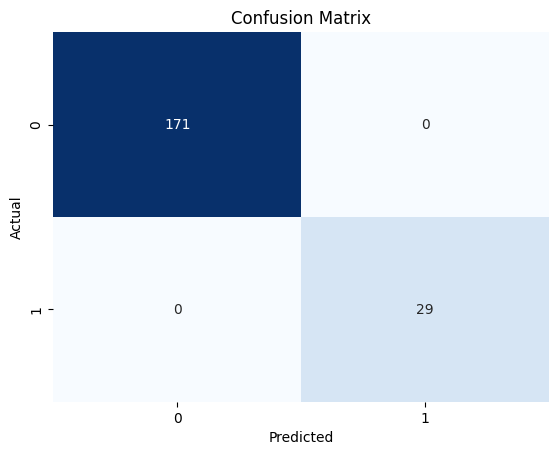

In [7]:
# Predict on the test set
y_pred = model.predict(X_test)

# Print evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot confusion matrix for better visualization
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [11]:
# Prompt user for input
temperature = float(input("Enter battery temperature (°C): "))
charge_cycles = int(input("Enter number of charge cycles: "))

# Create a DataFrame with the user input
sample_input = pd.DataFrame({
    'temperature': [temperature],
    'charge_cycles': [charge_cycles]
})

# Predict maintenance needs
prediction = model.predict(sample_input)

# Display result
if prediction[0] == 1:
    print("Predictive Maintenance Alert: Battery likely to fail soon.")
else:
    print("Battery health is stable.")


Enter battery temperature (°C): 50
Enter number of charge cycles: 750
Predictive Maintenance Alert: Battery likely to fail soon.
